### Creating An ANN using Pytorch

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:

df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


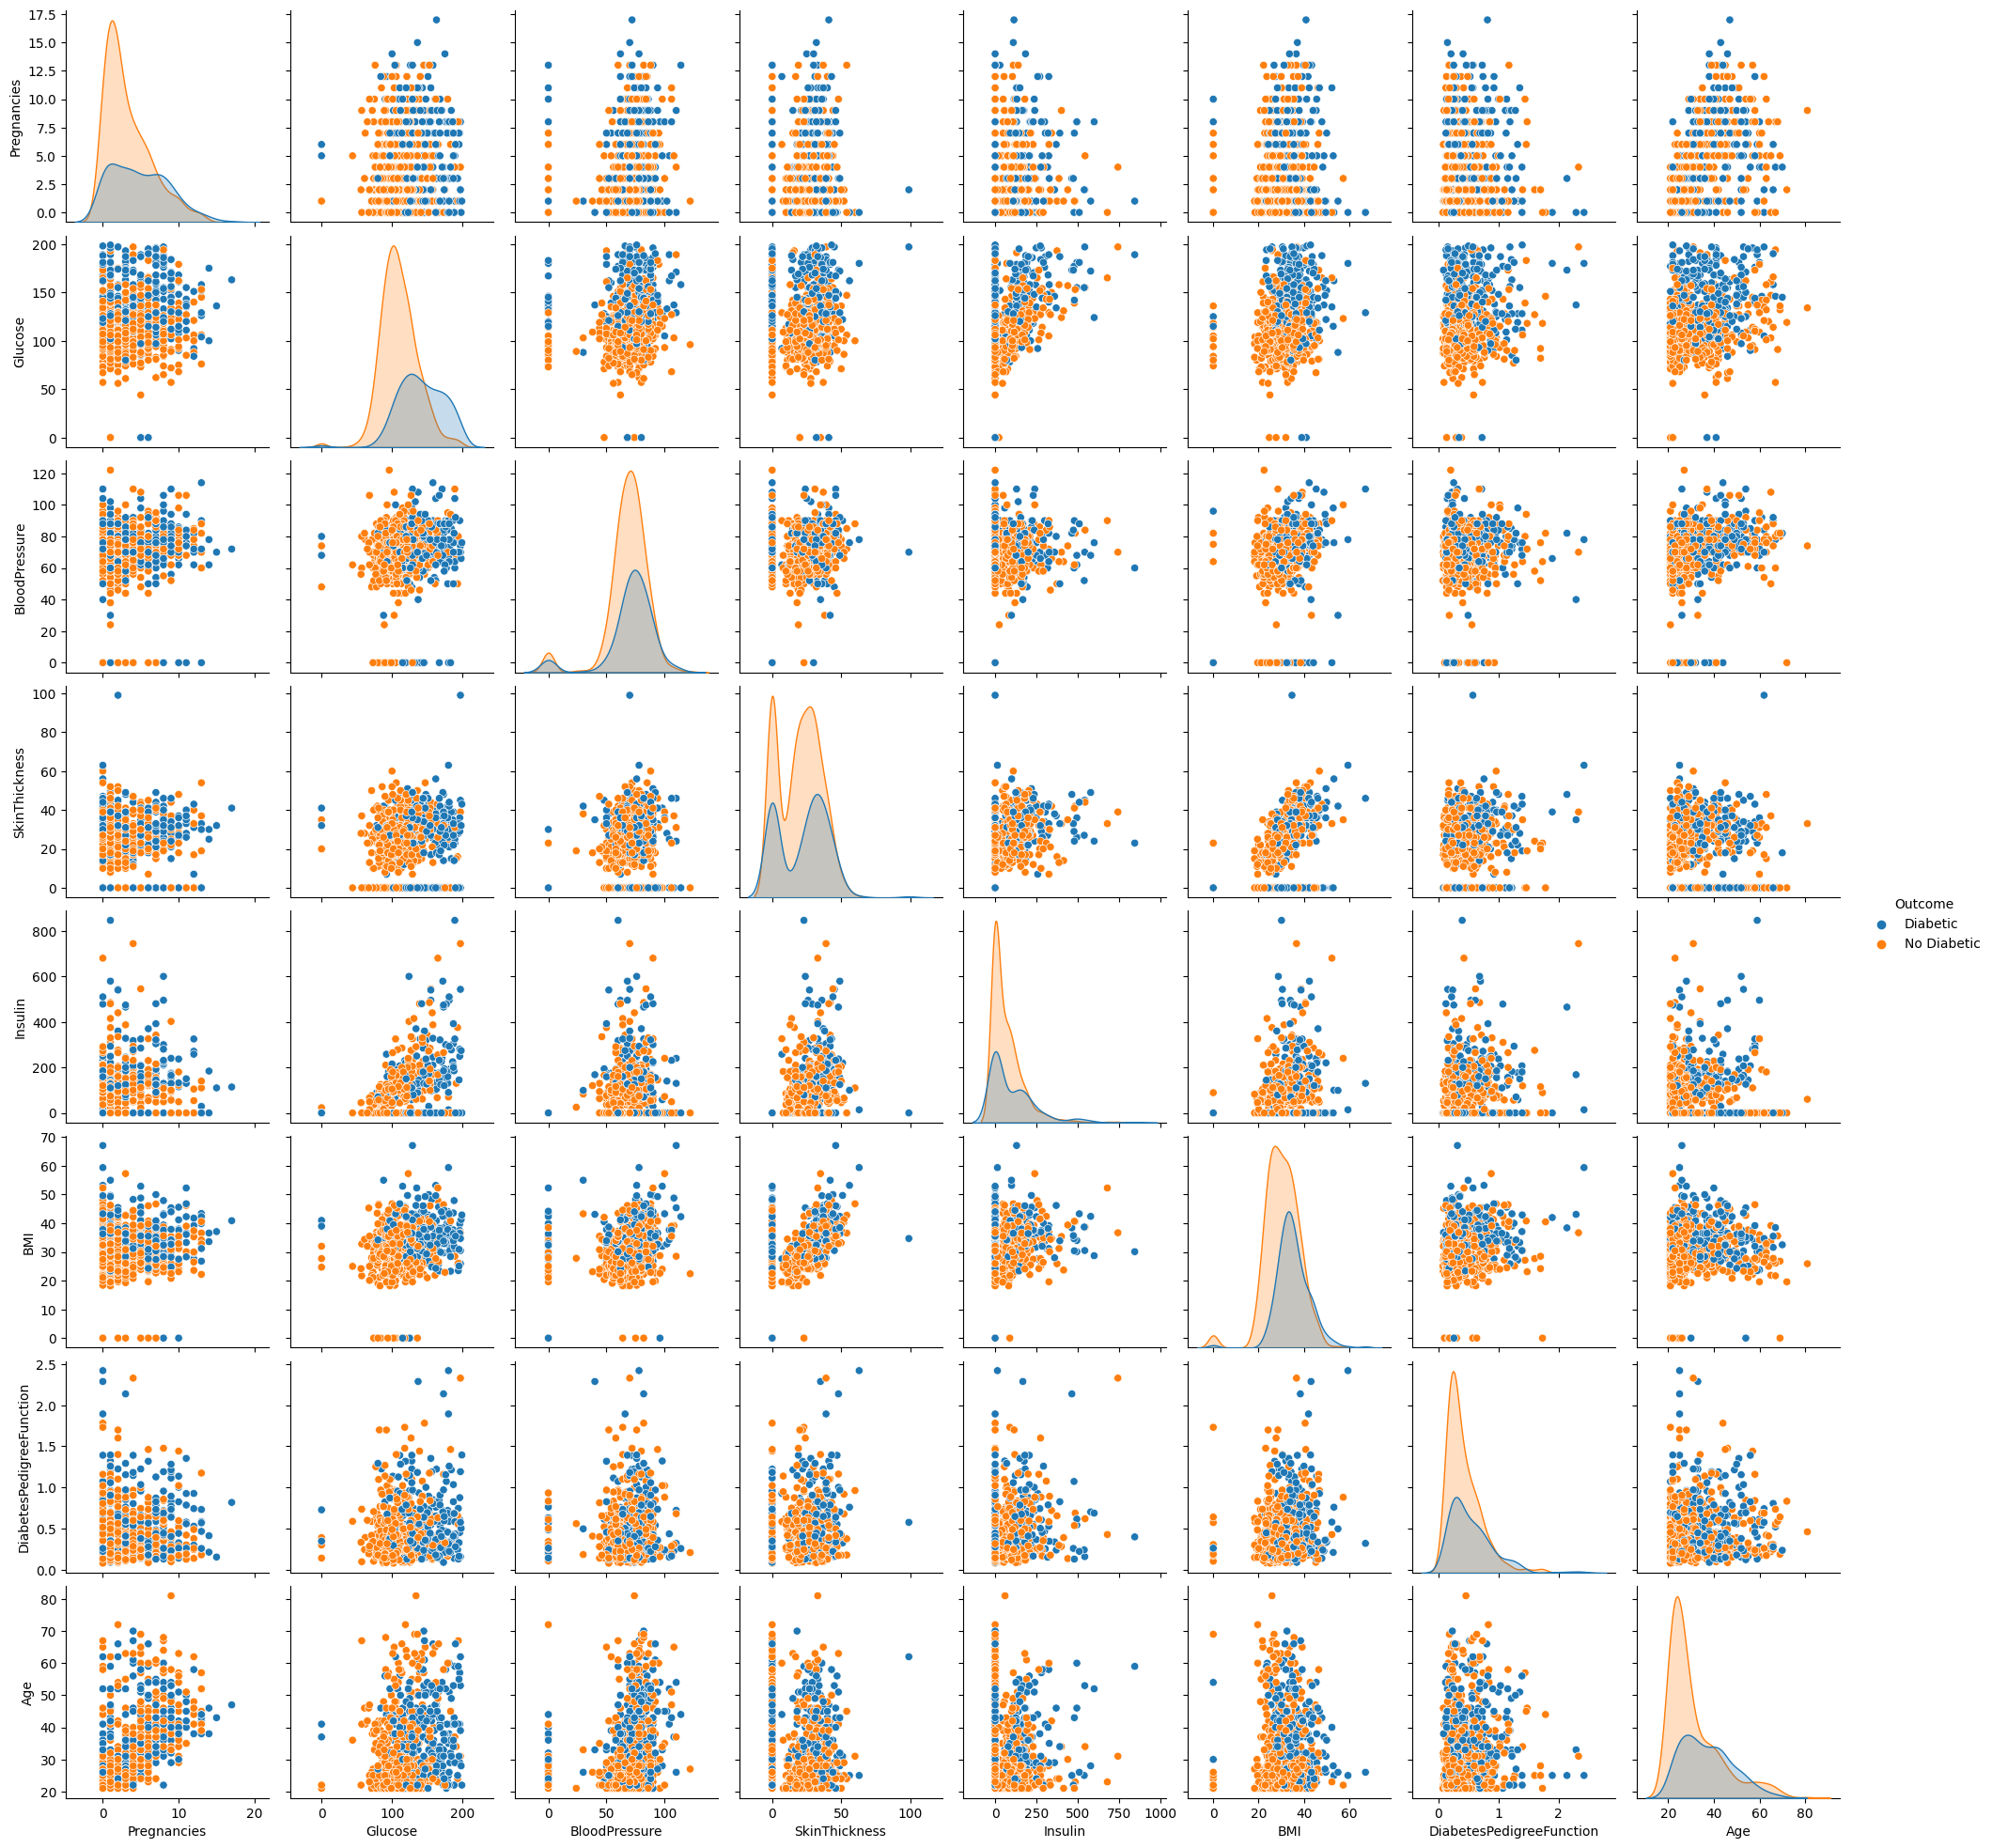

In [45]:
sns.pairplot(df,hue="Outcome")

In [46]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [49]:
X.shape

(768, 8)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_test.shape

(154, 8)

In [52]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [53]:
X_train.shape

(614, 8)

In [54]:
##### Creating Tensors
# It is mendatory to convert the indenpendent features into float tensors.
# And in case of dependent features it's not mendatory.
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [55]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([614, 8])
X_test shape: torch.Size([154, 8])
y_train shape: torch.Size([614])
y_test shape: torch.Size([154])


In [56]:
df.shape

(768, 9)

## Model

In [57]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [58]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [59]:
# model.get_submodule

In [60]:
model

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [61]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [62]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [63]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019207119941711
Epoch number: 21 and the loss : 0.6090322136878967
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135972499847412
Epoch number: 101 and the loss : 0.5061253905296326
Epoch number: 111 and the loss : 0.498340904712677
Epoch number: 121 and the loss : 0.4960551857948303
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4755900502204895
Epoch number: 151 and the loss : 0.48198607563972473
Epoch number: 161 and the loss : 0.48064836859703064
Epoch number: 171 and the loss : 0.4706920385360718
Epoch number: 181 and the loss : 0.45908692479133606


Epoch number: 191 and the loss : 0.4507930874824524
Epoch number: 201 and the loss : 0.444163978099823
Epoch number: 211 and the loss : 0.44218215346336365
Epoch number: 221 and the loss : 0.443209707736969
Epoch number: 231 and the loss : 0.43194958567619324
Epoch number: 241 and the loss : 0.43521177768707275
Epoch number: 251 and the loss : 0.41933000087738037
Epoch number: 261 and the loss : 0.4176027774810791
Epoch number: 271 and the loss : 0.43629634380340576
Epoch number: 281 and the loss : 0.4306843876838684
Epoch number: 291 and the loss : 0.41760239005088806
Epoch number: 301 and the loss : 0.4062289893627167
Epoch number: 311 and the loss : 0.40273022651672363
Epoch number: 321 and the loss : 0.3961154520511627
Epoch number: 331 and the loss : 0.4033721387386322
Epoch number: 341 and the loss : 0.40221765637397766
Epoch number: 351 and the loss : 0.3958454132080078
Epoch number: 361 and the loss : 0.38896337151527405
Epoch number: 371 and the loss : 0.3846299648284912
Epoch

In [64]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# plt.plot(torch.tensor.numpy(epochs),final_losses)
# # plt.ylabel('Loss')
# plt.xlabel('Epoch')

In [69]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [15, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

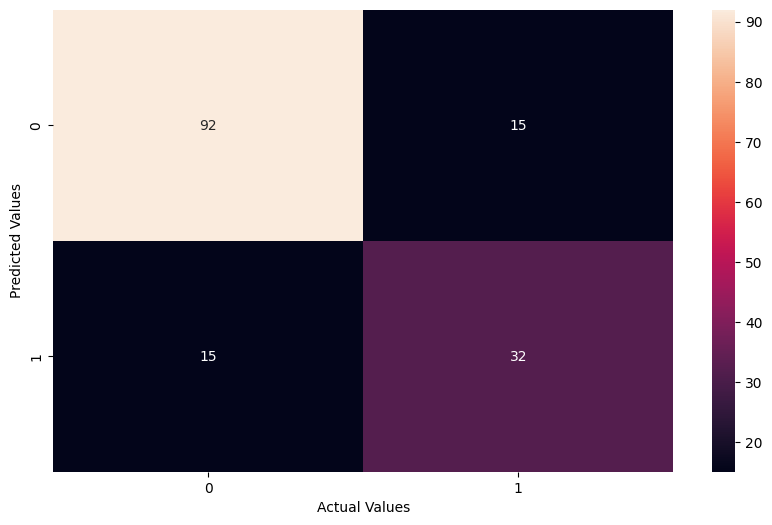

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [73]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [ ]:
new_data=torch.tensor(lst1)

In [ ]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1148, 1.4219])
1
